In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [33]:

# video_matrix = np.load("00335.npy", allow_pickle=True)['data']  # shape: [N, 2]
video_matrix = np.load("00599.npy")
n_samples = len(video_matrix)

In [ ]:
# pose skeletons and mapping
pose_edges = [(11, 12), (12, 14), (14, 16), (11, 13), (13, 15),
              (12, 24), (11, 23), (24, 23)]
pose_joints_map = {11: 0, 12: 1, 13: 2, 14: 3, 15: 4, 16: 5, 23: 6, 24: 7}

# hand skeletons
hand_edges = [
    (0, 1), (1, 2), (2, 3), (3, 4),       # Thumb
    (0, 5), (5, 6), (6, 7), (7, 8),       # Index
    (0, 9), (9,10), (10,11), (11,12),     # Middle
    (0,13), (13,14), (14,15), (15,16),    # Ring
    (0,17), (17,18), (18,19), (19,20)     # Pinky
]

def plot_frame(frame_id, frame_vec):
    frame_vec = np.array(frame_vec).reshape(-1, 4)  # shape: (50, 4)
    
    pose = frame_vec[:8]             # Pose: indices 11–24
    left_hand = frame_vec[8:29]      # 21 joints
    right_hand = frame_vec[29:50]    # 21 joints

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # --- Draw Pose ---
    for i, j in pose_edges:
        a, b = pose_joints_map[i], pose_joints_map[j]
        xA, yA, zA, vA = pose[a]
        xB, yB, zB, vB = pose[b]
        if vA > 0 and vB > 0:
            ax.plot([xA, xB], [yA, yB], [zA, zB], 'b-', linewidth=2)

    for idx, (x, y, z, v) in zip(pose_joints_map.keys(), pose):
        if v > 0:
            ax.scatter(x, y, z, c='blue')
            ax.text(x, y, z, f'{idx}', color='blue', fontsize=9)

    # --- Draw Left Hand ---
    for i, j in hand_edges:
        if left_hand[i][3] > 0 and left_hand[j][3] > 0:
            ax.plot([left_hand[i][0], left_hand[j][0]],
                    [left_hand[i][1], left_hand[j][1]],
                    [left_hand[i][2], left_hand[j][2]], 'red', linewidth=1.2)
    for i, (x, y, z, v) in enumerate(left_hand):
        if v > 0:
            ax.scatter(x, y, z, c='red')
            ax.text(x, y, z, f'L{i}', color='red', fontsize=8)

    # --- Draw Right Hand ---
    for i, j in hand_edges:
        if right_hand[i][3] > 0 and right_hand[j][3] > 0:
            ax.plot([right_hand[i][0], right_hand[j][0]],
                    [right_hand[i][1], right_hand[j][1]],
                    [right_hand[i][2], right_hand[j][2]], 'green', linewidth=1.2)
    for i, (x, y, z, v) in enumerate(right_hand):
        if v > 0:
            ax.scatter(x, y, z, c='green')
            ax.text(x, y, z, f'R{i}', color='green', fontsize=8)

    # --- View ---
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(f"Frame {frame_id}: Pose + Hands 3D")
    ax.view_init(elev=-100, azim=-90)
    ax.set_box_aspect([1, 1, 1])
    plt.tight_layout()
    plt.show()



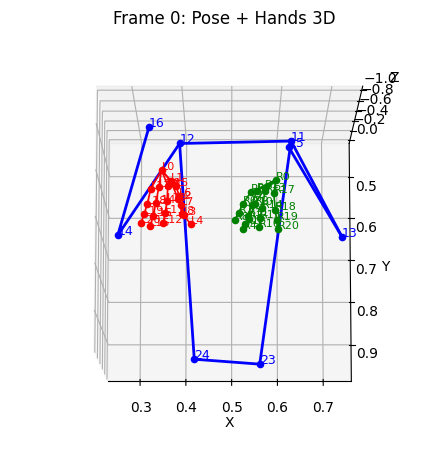

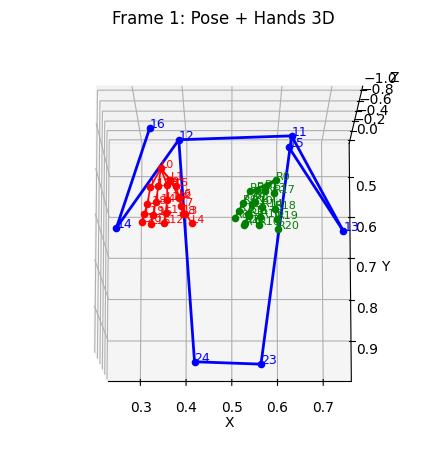

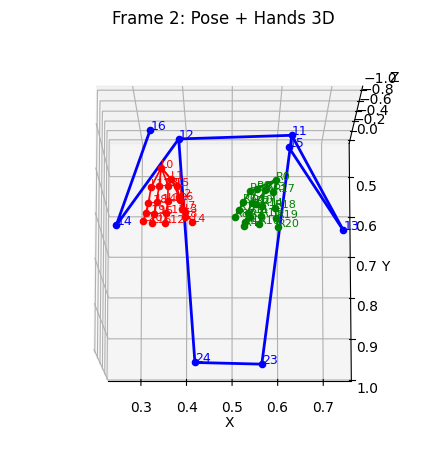

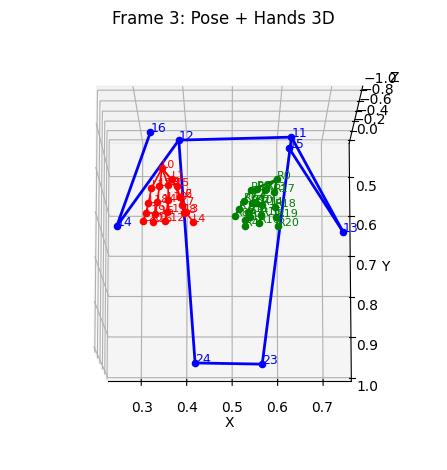

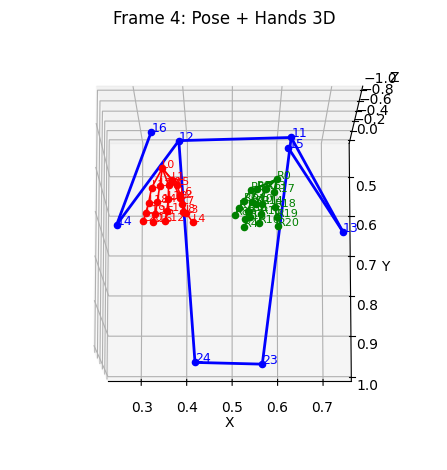

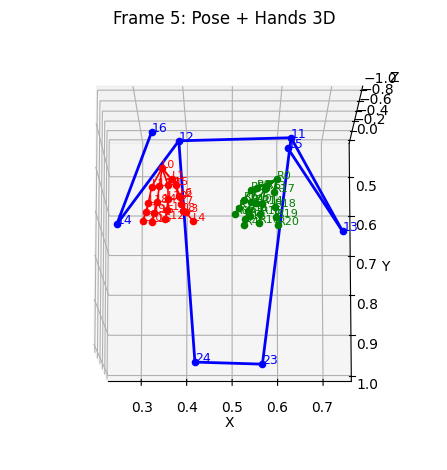

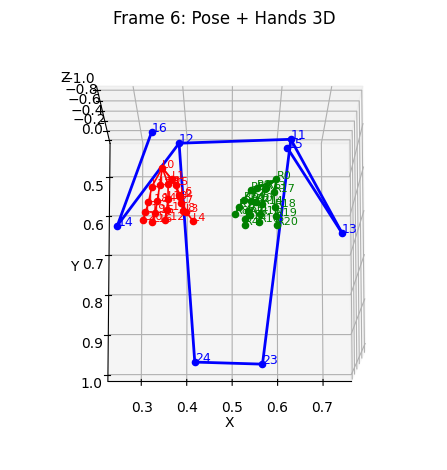

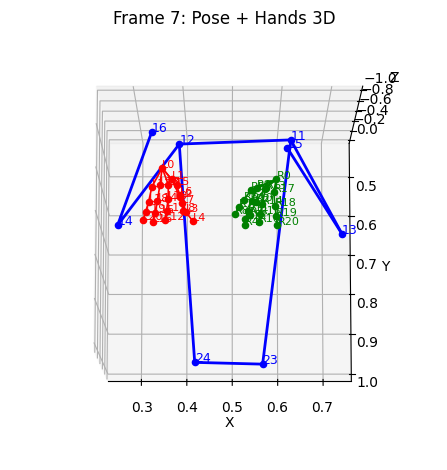

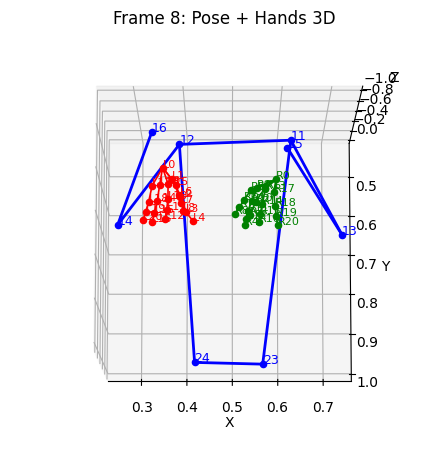

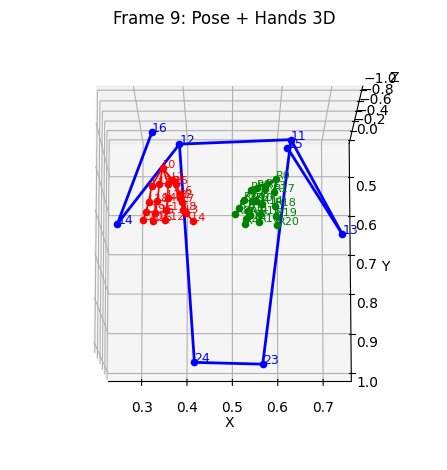

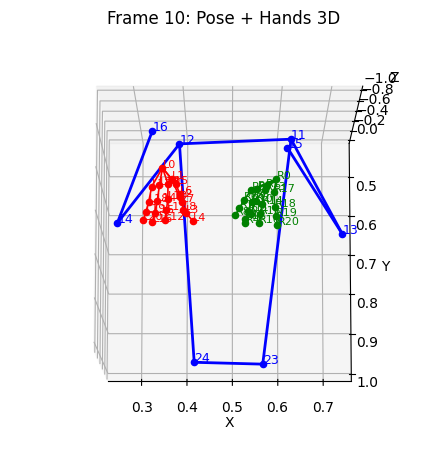

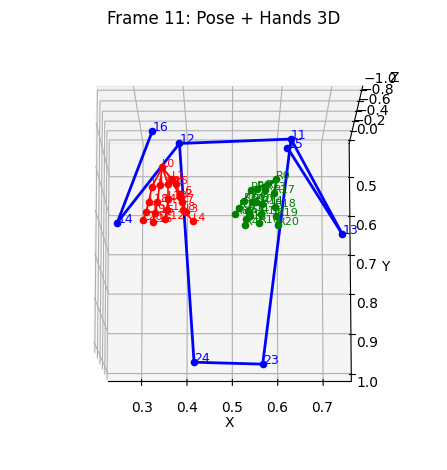

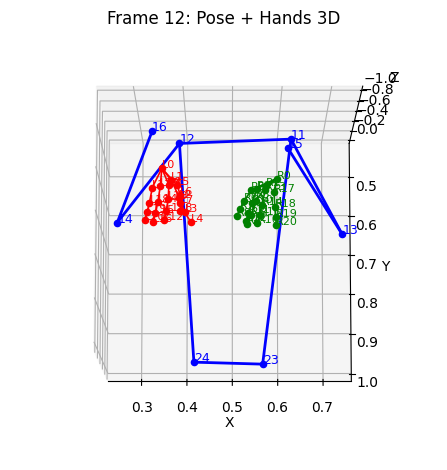

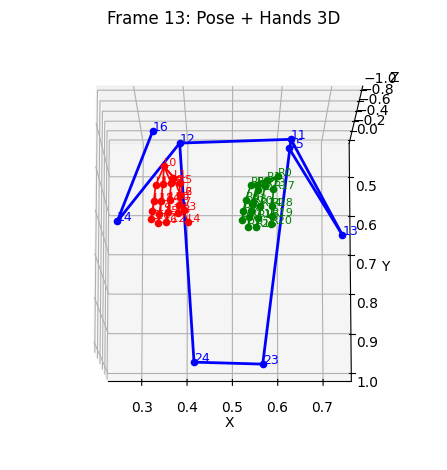

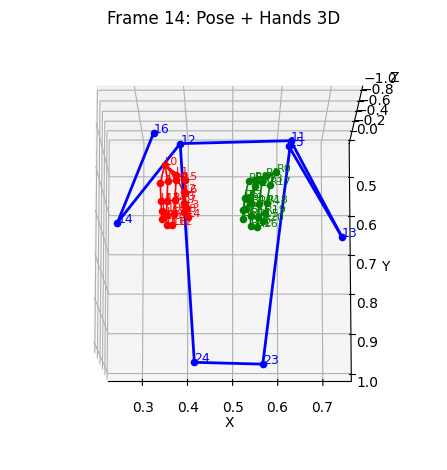

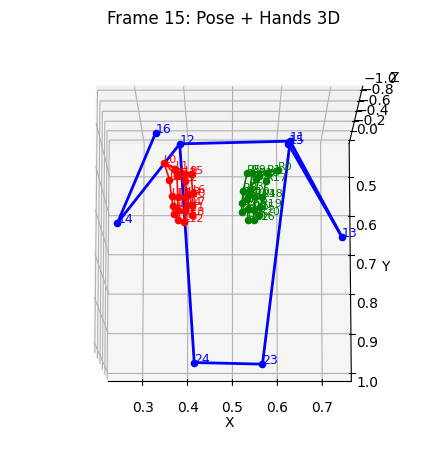

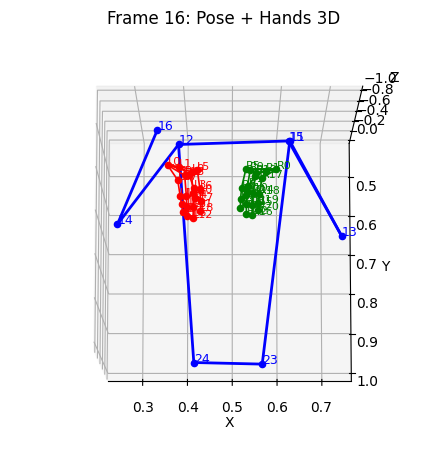

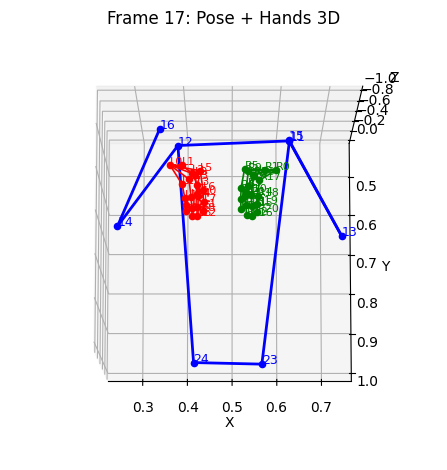

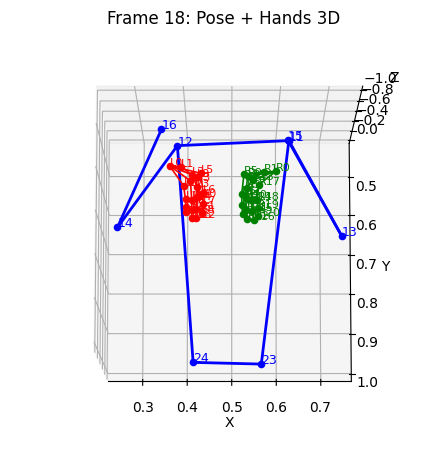

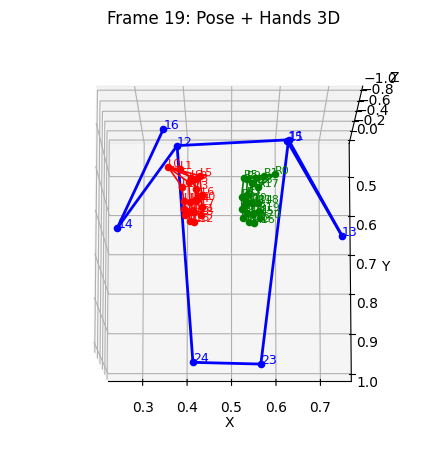

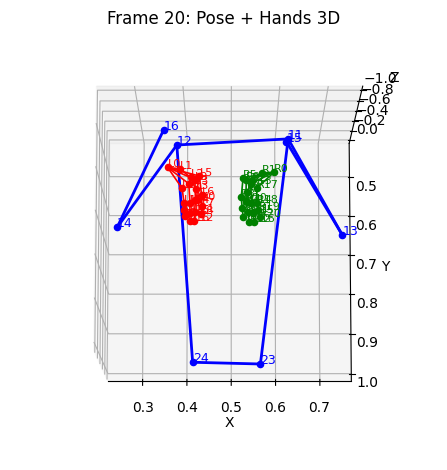

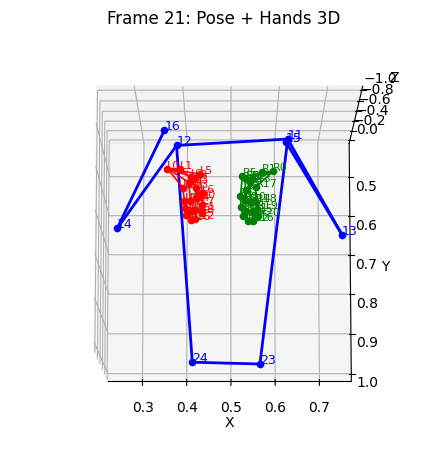

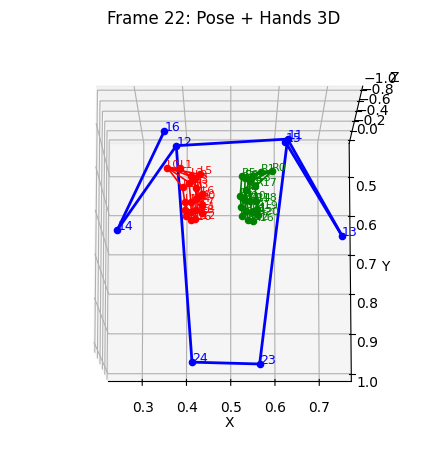

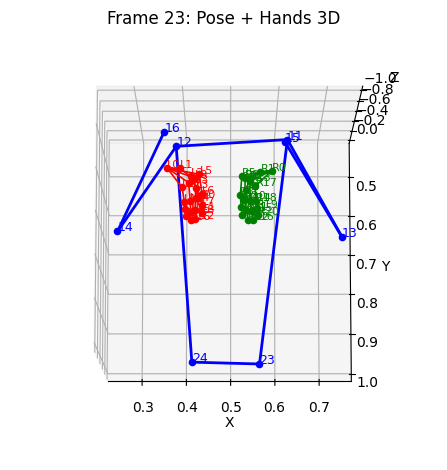

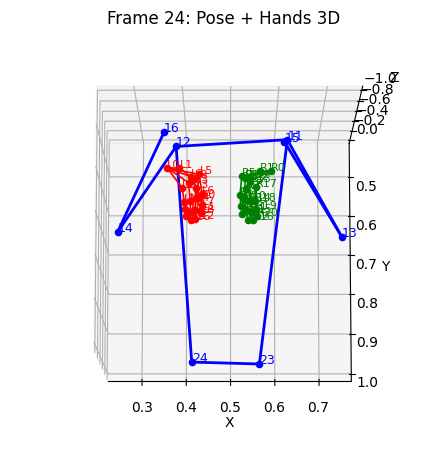

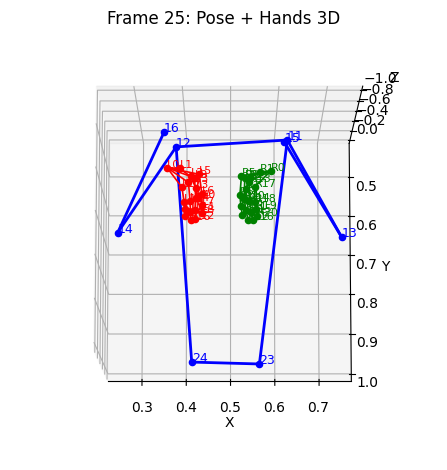

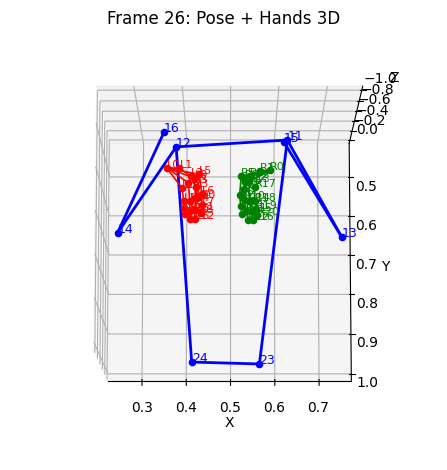

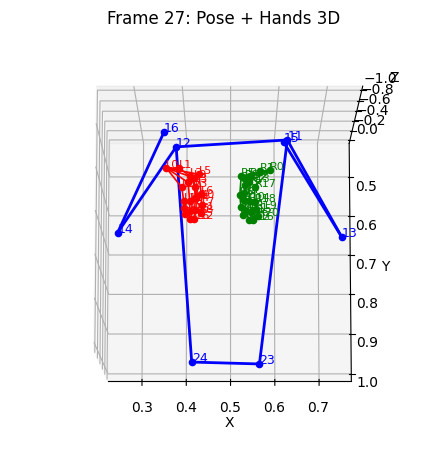

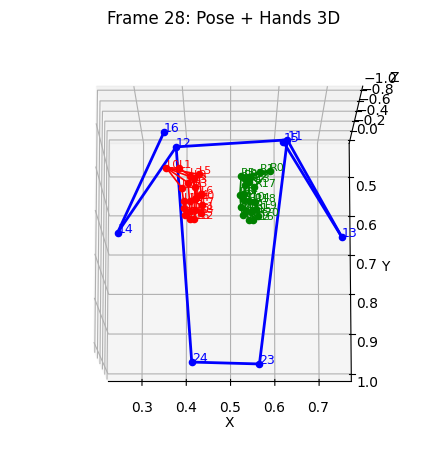

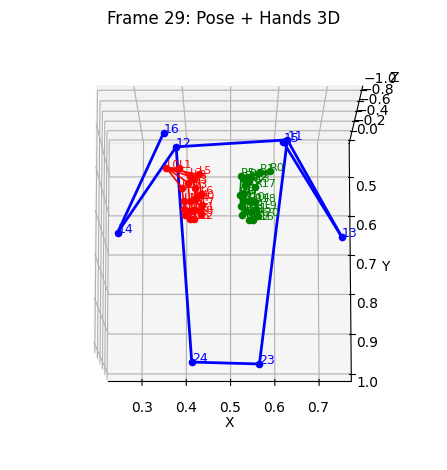

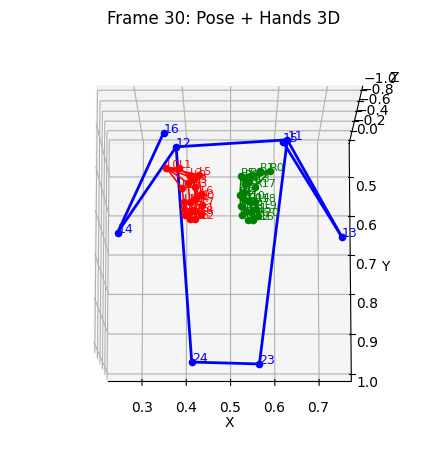

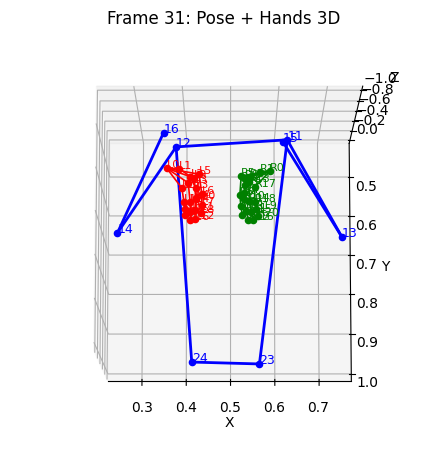

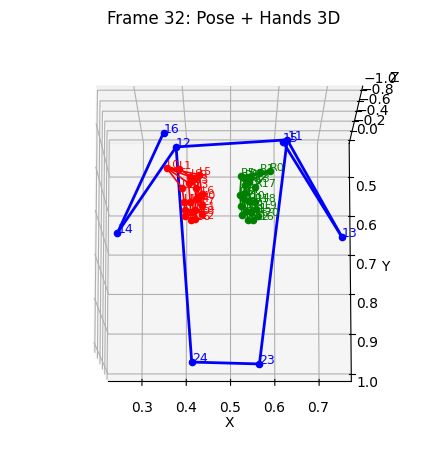

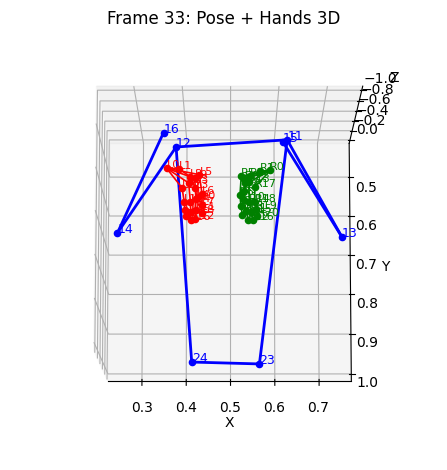

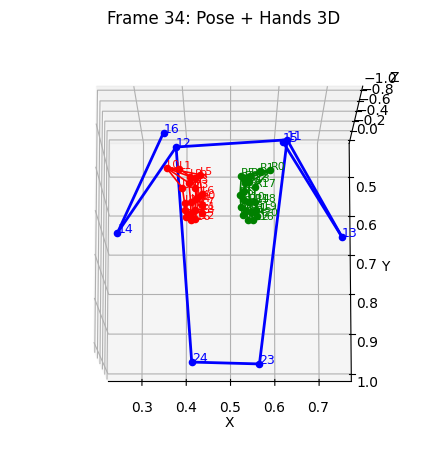

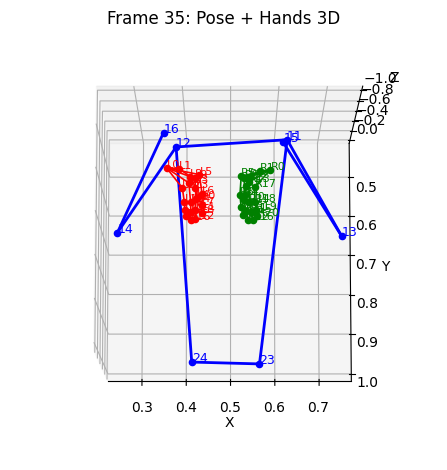

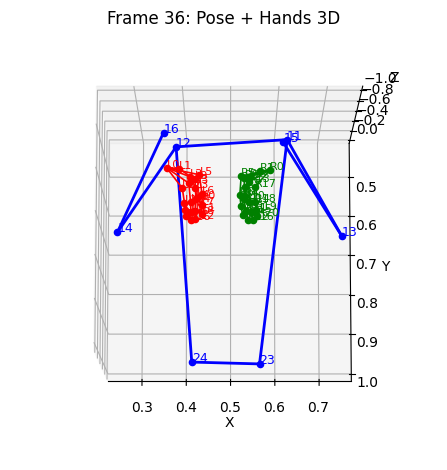

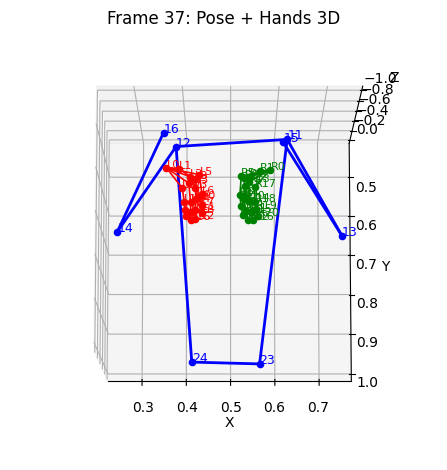

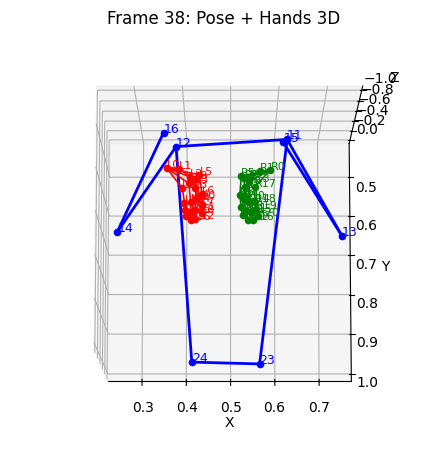

In [42]:
for i, frame in enumerate(video_matrix): 
    plot_frame(i, frame)
